# The Gaussian distribution

The SD is a measure of the spread of the distribution, with about 95% of the values in a Gaussian population within 2 SD of the mean (actually 1.96).

A **standard normal** distribution is a Gaussian with mean of 0 and SD of 1.

The **central limit theorem** (CLT) explains that the distribution of many sample (randomly picked up) means will tend to be Gaussian even if the data are not sampled from a Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
# set the parameters
mean = 0
std = 1

# set the Gaussian model
gauss = stats.norm(loc=mean, scale=std)

# define the x space based of the PPF from the model, basically from min to max
x = np.linspace(
    gauss.ppf(0.0001), # could also put from mean - 3 * std
    gauss.ppf(0.9999), #                  to mean + 3 * std
    num=100
)

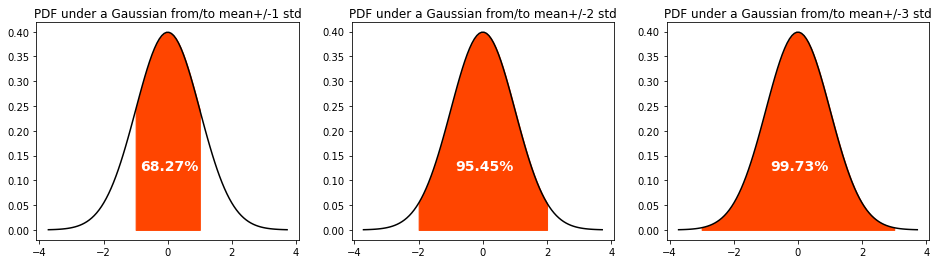

In [146]:
# we plot 3 subplots one for each z or number of SD away from the mean
f = plt.figure(figsize=(16,4))

for SD in range(1, 4):
    plt.subplot(1, 3, SD)
    # plot the entire Gaussian curve
    plt.plot(x, gauss.pdf(x), 'k')

    # # fill below the curve between mean - 2 * SD and mean + 2 * SD
    select = np.linspace(mean - SD * std, mean + SD * std, num=50) # x array the curve to be filled
    plt.fill_between(
        select,
        gauss.pdf(select),
        color='orangered',
    )

    plt.text(
        -.85, .12,
        f"{100 * (1 - 2*(1 - gauss.cdf(SD))):.2f}%",
        fontdict={'color': 'white', 'size':14, 'weight':'bold'})
    plt.title(f"PDF under a Gaussian from/to mean+/-{SD} std");

## CDF

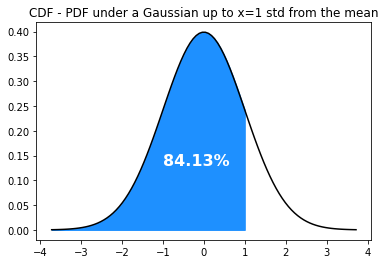

In [110]:
# plot the entire Gaussian curve
plt.plot(x, gauss.pdf(x), 'k')

# fill below the curve between minimum and mean + 1 * SD
X = 1 # point to get the CDF
select = np.linspace(gauss.ppf(0.0001), X, num=50) # from minimum x to 1 SD
plt.fill_between(
    select,
    gauss.pdf(select),
    color='dodgerblue',
)

plt.text(-1, .13, f"{100 * gauss.cdf(X):.2f}%", fontdict={'color': 'white', 'size':16, 'weight':'bold'})
plt.title(f"CDF - PDF under a Gaussian up to x={X} std from the mean");

In [42]:
# we can give a list to compute all CDFs at once
stats.norm.cdf(np.arange(-3, 4))

array([0.0013499 , 0.02275013, 0.15865525, 0.5       , 0.84134475,
       0.97724987, 0.9986501 ])

## Survival function (SF)

Also known as 1 - CDF

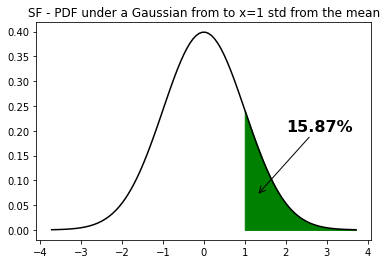

In [109]:
# plot the entire Gaussian curve
plt.plot(x, gauss.pdf(x), 'k')

X = 1 # point to get the CDF
select = np.linspace(X, gauss.ppf(q=0.9999), num=50)
plt.fill_between(
    select,
    gauss.pdf(select),
    color='green',
)

plt.annotate(
    xy=(1.3, .07),
    xytext=(2, .20),
    text=f"{100 * gauss.sf(x=X):.2f}%",
    arrowprops={'arrowstyle': '->'},
    size=16,
    weight='bold',
)
plt.title(f"SF - PDF under a Gaussian from to x={X} std from the mean");

## 2-tailed SF (or inverse CDF)

This one is used for the calculation of the P-values.

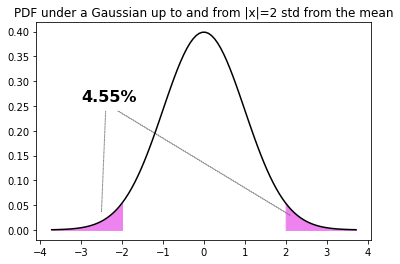

In [131]:
# plot the entire Gaussian curve
plt.plot(x, gauss.pdf(x), 'k')

# # fill below the curve between mean - 2 * SD and mean + 2 * SD
X = 2 # absolute point to get the SF

total_pdf = 1 - 2 * (1 - gauss.cdf(X)) # because of the symmetry of the curve

select1 = np.linspace(-X, gauss.ppf(q=0.0001), num=50)
select2 = np.linspace(gauss.ppf(q=0.9999), X,  num=50)

plt.fill_between(
    select1,
    gauss.pdf(select1),
    color='violet',
)

plt.fill_between(
    select2,
    gauss.pdf(select2),
    color='violet',
)

plt.text(-3.0, .26, f"{100 * (1 - total_pdf):.2f}%", fontdict={'color': 'black', 'size':16, 'weight':'bold'})
plt.arrow(x=-2.4, y=.24, dx=-.1, dy=-.2, color='grey', ls=':')
plt.arrow(x=-2.1, y=.24, dx=2.1+2.1, dy=-.21, color='grey', ls=':')

plt.title(f"PDF under a Gaussian up to and from |x|={X} std from the mean");

## The standard normal distribution

When the mean equals 0 and the SD equals 1.0, the Gaussian (or normal) distribution is called _standard normal distribution_.
All Gaussian distributions can be converted to a standard normal distribution by substracting the mean from each value and dividing the difference by the SD:

$$z=\frac{\text{value}-\text{mean}}{\text{SD}}$$

The variable $z$ is the number of SD away from the mean, e.g. when $z=1$ a value of 1 SD above the mean, when $z=-2$ a value of 2 SD below the mean.